[Wave ranges](https://www.ncbi.nlm.nih.gov/books/NBK539805/) 
- delta (0.5 to 4Hz)
- theta (4 to 7Hz)
- alpha (8 to 12Hz)
- sigma (12 to 16Hz)
- beta (13 to 30Hz)

[Meaning](https://www.medicine.mcgill.ca/physio/vlab/biomed_signals/eeg_n.htm)
- Delta: frontally in adults and posteriorly in children.
- Theta: is classified as "slow" activity. (sleep)
- Alpha: Is usually best seen in the posterior regions of the head on each side, being higher in amplitude on the dominant side. It appears when closing the eyes and relaxing, and disappears when opening the eyes or alerting by any mechanism (thinking, calculating).
- Beta: beta activity is "fast" activity. It is usually seen on both sides in symmetrical distribution and is most evident frontally. 


[Compute the average bandpower of an EEG signal](https://raphaelvallat.com/bandpower.html)

Average band power: consists in computing a single number that summarizes the contribution of the given frequency band to the overall power of the signal. 


[Polarity rules - eye movements in EEG](https://www.youtube.com/watch?v=s1GknlqKGYo)

## Setup environment

Load from Google Drive the files to train the model

In [1]:
DATA_PATH = 'backyard_data/'
!ls $DATA_PATH'original3/left'

BYB_Recording_2021-11-17_14.52.57.wav BYB_Recording_2021-11-17_14.54.05.wav
BYB_Recording_2021-11-17_14.53.02.wav BYB_Recording_2021-11-17_14.54.09.wav
BYB_Recording_2021-11-17_14.53.08.wav BYB_Recording_2021-11-17_14.54.13.wav
BYB_Recording_2021-11-17_14.53.12.wav BYB_Recording_2021-11-17_14.54.19.wav
BYB_Recording_2021-11-17_14.53.16.wav BYB_Recording_2021-11-17_14.54.26.wav
BYB_Recording_2021-11-17_14.53.21.wav BYB_Recording_2021-11-17_14.54.32.wav
BYB_Recording_2021-11-17_14.53.25.wav BYB_Recording_2021-11-17_14.54.37.wav
BYB_Recording_2021-11-17_14.53.29.wav BYB_Recording_2021-11-17_14.54.42.wav
BYB_Recording_2021-11-17_14.53.33.wav BYB_Recording_2021-11-17_14.54.47.wav
BYB_Recording_2021-11-17_14.53.37.wav BYB_Recording_2021-11-17_14.54.53.wav
BYB_Recording_2021-11-17_14.53.42.wav BYB_Recording_2021-11-17_14.54.58.wav
BYB_Recording_2021-11-17_14.53.47.wav BYB_Recording_2021-11-17_14.55.03.wav
BYB_Recording_2021-11-17_14.53.51.wav BYB_Recording_2021-11-17_14.55.08.wav
BYB_Recordin

In [2]:
DATA_PATH = 'backyard_data/'
!ls $DATA_PATH'original3/right'

BYB_Recording_2021-11-17_14.49.56.wav BYB_Recording_2021-11-17_14.51.30.wav
BYB_Recording_2021-11-17_14.50.03.wav BYB_Recording_2021-11-17_14.51.34.wav
BYB_Recording_2021-11-17_14.50.10.wav BYB_Recording_2021-11-17_14.51.38.wav
BYB_Recording_2021-11-17_14.50.17.wav BYB_Recording_2021-11-17_14.51.41.wav
BYB_Recording_2021-11-17_14.50.22.wav BYB_Recording_2021-11-17_14.51.47.wav
BYB_Recording_2021-11-17_14.50.30.wav BYB_Recording_2021-11-17_14.51.52.wav
BYB_Recording_2021-11-17_14.50.35.wav BYB_Recording_2021-11-17_14.51.57.wav
BYB_Recording_2021-11-17_14.50.50.wav BYB_Recording_2021-11-17_14.52.04.wav
BYB_Recording_2021-11-17_14.50.55.wav BYB_Recording_2021-11-17_14.52.10.wav
BYB_Recording_2021-11-17_14.51.00.wav BYB_Recording_2021-11-17_14.52.16.wav
BYB_Recording_2021-11-17_14.51.05.wav BYB_Recording_2021-11-17_14.52.21.wav
BYB_Recording_2021-11-17_14.51.10.wav BYB_Recording_2021-11-17_14.52.27.wav
BYB_Recording_2021-11-17_14.51.15.wav BYB_Recording_2021-11-17_14.52.32.wav
BYB_Recordin

Let´s check the amount of files for each class

In [3]:
!ls $DATA_PATH'original3/left' | wc -l

      30


In [4]:
!ls $DATA_PATH'original3/right' | wc -l

      27


Install dependencies

In [5]:
!pip install -U audiosegment
import audiosegment
import math
import os
from os import listdir
from os.path import isfile, join, splitext
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io.wavfile as waves
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
!pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_confusion_matrix

     |████████████████████████████████| 66 kB 348 kB/s eta 0:00:01
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp38-cp38-macosx_11_0_arm64.whl size=28333 sha256=059b5c65a1a1a2aca9ec304206157955a3cbfa8010936f46cdef4e1f210bdcd1
  Stored in directory: /Users/mika/Library/Caches/pip/wheels/75/e1/fc/01099a9fd0882ce84cc99eb51495812bb8a703461c2b0ca1cb
Successfully built webrtcvad


/Users/mika/miniforge3/envs/fastai/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Requirement already up-to-date: mlxtend in /Users/mika/miniforge3/envs/fastai/lib/python3.8/site-packages (0.19.0)


## Visualize data

Show the frequencies and the amplitude for test files to left and right registries.

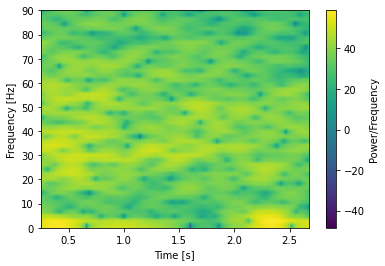

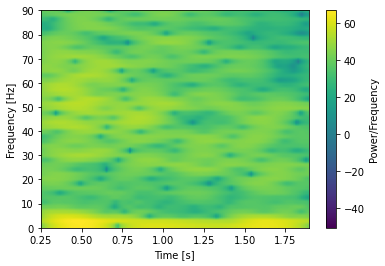

In [6]:
def show_file(test_file, plotname):
  fs, data = waves.read(test_file)
  length_data=np.shape(data)
  length_new=length_data[0]*0.05
  ld_int=int(length_new)
  from scipy import signal
  data_new=signal.resample(data,ld_int)
  plt.figure('Spectrogram')
  d, f, t, im = plt.specgram(data_new, NFFT= 256, Fs=500, noverlap=250)
  plt.ylim(0,90)
  plt.colorbar(label= "Power/Frequency")
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [s]')
  plt.savefig(f'{plotname}_frequency.png')
  plt.show()

test_file_left = DATA_PATH + 'original3/left/BYB_Recording_2021-11-17_14.55.08.wav'
show_file(test_file_left, 'left')
test_file_right = DATA_PATH + 'original3/right/BYB_Recording_2021-11-17_14.51.38.wav'
show_file(test_file_right, 'right')

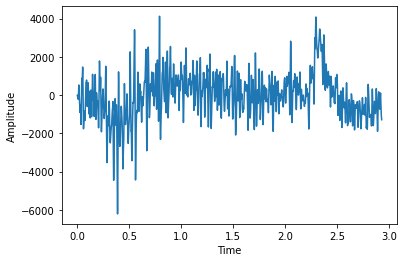

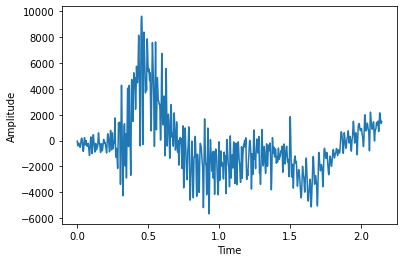

In [7]:
from scipy.io import wavfile

def plot_amplitude(test_file, plotname):
  rate, audio = wavfile.read(test_file)
  N = audio.shape[0]
  L = N / rate
  f, ax = plt.subplots()
  ax.plot(np.arange(N) / rate, audio)
  ax.set_xlabel('Time')
  ax.set_ylabel('Amplitude');
  f.savefig(f'{plotname}_amplitude.png')   
  plt.show()
  plt.close(f)    

plot_amplitude(test_file_left, 'left')
plot_amplitude(test_file_right, 'right')



Calculate duration for the wav files

In [8]:
def calculate_duration(file_path):
  (source_rate, source_sig) = waves.read(file_path)
  duration_seconds = len(source_sig) / float(source_rate)
  return duration_seconds

#test function
print(calculate_duration(test_file_left))
print(calculate_duration(test_file_right))

2.9295
2.1452


Now we will get the histogram for the frequencies values for each file left and right.

In [9]:
def get_hist_vals(file_path):
  seg = audiosegment.from_file(file_path)
  _,hist_vals = seg.fft()
  return hist_vals

hist_vals_left = get_hist_vals(test_file_left)
hist_vals_right = get_hist_vals(test_file_right)

In [10]:
seg = audiosegment.from_file(test_file_left)
_,hist_vals = seg.fft()

In [11]:
hist_vals_left

array([-8.48350000e+05+0.00000000e+00j, -6.73963810e+06+3.35963951e+06j,
       -5.43775638e+06+6.01816819e+06j, ...,
        6.38801460e+02-2.07406740e+01j,  6.20537389e+02+5.06090564e+00j,
        6.20537389e+02-5.06090564e+00j])

We can divide the frequencies among the different bands 

In [12]:
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}
columns = []
for band in eeg_bands:
  columns.append(band + '_0')
  columns.append(band + '_m')
  columns.append(band + '_l')
  
def get_bands(hist_vals):
  bands_values = dict()
  for band in eeg_bands:  
      freq_ix = np.where((hist_vals >= eeg_bands[band][0]) & 
                        (hist_vals <= eeg_bands[band][1]))[0]
      bands_values[band] = hist_vals[freq_ix]
  return bands_values

In [13]:
def get_frequency(filepath):
  data_freq = []
  seg = audiosegment.from_file(filepath)
  _ , hist_vals = seg.fft()
  eeg_band_fft = dict()
  bands_values = get_bands(hist_vals)
  for band in bands_values:
      len_ids = len(bands_values[band])
      if (len_ids==0):
        band_value_0 = band_value_m = band_value_m = band_value_l = 0
      elif (len_ids<3):
        band_value_0 = band_value_m = band_value_m = band_value_l = np.absolute(np.median(bands_values[band]))
      else:
        band_value_0 = np.absolute(bands_values[band][0])
        band_value_m = np.absolute(np.median(bands_values[band]))
        band_value_l = np.absolute(bands_values[band][len_ids -1])
      data_freq.append(band_value_0)
      data_freq.append(band_value_m)
      data_freq.append(band_value_l)
  
  df = pd.DataFrame(data_freq).transpose()
  cols = []
  for b in eeg_bands:
    cols.append(b + '_0')
    cols.append(b + '_m')
    cols.append(b + '_l')

  df.columns = cols
  return df

For each file in the directory get the frequencies bands with the function created. Keeping 3 values (first, median and last) 

In [14]:
df = pd.DataFrame()

for dirname in listdir(DATA_PATH + '/original3'):
  mypath = DATA_PATH + '/original3/' + dirname + '/'
  files = [os.path.basename(x) for x in os.listdir(DATA_PATH + '/original3/' + dirname)]
  for filename in files:
    df_aux = get_frequency(mypath + filename)
    df_aux.columns = columns
    df_aux['class'] = dirname
    df_aux['filename'] = filename
    df = df.append(df_aux)


We can show some values for left and right classes 
 

In [15]:
df[df['class']=='left'].head()

,Delta_0,Delta_m,Delta_l,Theta_0,Theta_m,Theta_l,Alpha_0,Alpha_m,Alpha_l,Beta_0,Beta_m,Beta_l,Gamma_0,Gamma_m,Gamma_l,class,filename
0,2065.457657,715.101011,715.015895,1934.348784,722.400060,589.980927,611.412296,955.310043,733.096965,2848.163445,1016.968730,494.032442,1334.664904,794.588363,690.749590,left,BYB_Recording_2021-11-17_14.54.19.wav
0,1086.800310,1086.800310,1086.800310,614.805215,614.805215,614.805215,42.902695,42.902695,42.902695,1877.702426,216.668285,71.918825,714.260205,82.334261,53.985090,left,BYB_Recording_2021-11-17_14.54.32.wav
0,1906.007612,58.893948,58.893948,1048.751556,1048.751556,1048.751556,9967.319069,9967.319069,1825.656758,2370.344834,48.682762,48.682762,1504.827914,1044.444502,106.108888,left,BYB_Recording_2021-11-17_14.54.26.wav
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6496.139994,6496.139994,6496.139994,19702.420011,7301.090749,5589.191356,11602.788390,11602.788390,5816.446540,left,BYB_Recording_2021-11-17_14.53.12.wav
0,0.000000,0.000000,0.000000,803.510859,803.510859,803.510859,0.000000,0.000000,0.000000,499.406752,105.294070,705.843277,84784.723255,695.188810,637.586576,left,BYB_Recording_2021-11-17_14.54.37.wav


In [16]:
df[df['class']=='right'].head()

,Delta_0,Delta_m,Delta_l,Theta_0,Theta_m,Theta_l,Alpha_0,Alpha_m,Alpha_l,Beta_0,Beta_m,Beta_l,Gamma_0,Gamma_m,Gamma_l,class,filename
0,73.391211,4.951559,46.086786,376.237022,35.042356,16.397740,892.504809,20.914848,26.244233,48.887315,23.422529,35.251964,1453.061042,45.701607,48.881619,right,BYB_Recording_2021-11-17_14.50.55.wav
0,0.000000,0.000000,0.000000,4463.138270,4463.138270,4463.138270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5112.412432,5112.412432,5112.412432,right,BYB_Recording_2021-11-17_14.51.15.wav
0,5252.386528,5252.386528,5252.386528,14183.642686,14183.642686,14183.642686,9119.266251,6504.138872,6504.138872,8790.609282,8790.609282,5626.948203,7215.624598,6760.527825,5930.098878,right,BYB_Recording_2021-11-17_14.51.00.wav
0,1573.169616,1238.992376,1063.116362,2872.334578,660.417139,945.219858,950.880234,1234.956286,940.212295,16207.247359,1321.032990,317.306615,4131.949059,1574.736949,748.648189,right,BYB_Recording_2021-11-17_14.50.50.wav
0,0.000000,0.000000,0.000000,5960.380500,5960.380500,5960.380500,7791.852686,7791.852686,7791.852686,5884.677492,5884.677492,5884.677492,6666.402606,6666.402606,6666.402606,right,BYB_Recording_2021-11-17_14.51.38.wav


The whole dataframe has 57 rows and 17 columns: 

In [17]:
df.shape

(57, 17)

Add class id to the dataframe (0 -> right or 1 -> left)

In [18]:
classes_name = ['right', 'left']
predictors = columns
df['class_idx'] = df['class'].apply(lambda x: classes_name.index(x))

Split into train and test sets

In [19]:
from sklearn.model_selection import train_test_split
X = df[predictors]
y = df['class_idx'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=23)

Train the model using a RandomForestClassifier 

In [20]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.60


Classification Report

              precision    recall  f1-score   support

       right       0.50      0.83      0.62         6
        left       0.80      0.44      0.57         9

    accuracy                           0.60        15
   macro avg       0.65      0.64      0.60        15
weighted avg       0.68      0.60      0.59        15



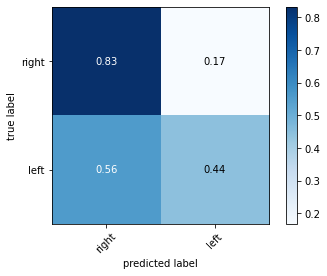

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes_name))

cm  = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=classes_name)
plt.show()
plt.show()
fig.savefig('confusion_matrix.png') 
plt.close(fig)